# Clinical Application


**Dataset**

https://physionet.org/content/crisdb/1.0.0/

**References**

This work was completed in Udacity's AI for Healthcare Nanodegree Program.

## Import libraries

In [1]:
import glob
import os

import numpy as np
import pandas as pd

## Load the dataset

In [2]:
hr_filenames = glob.glob('/data/crisdb/*.npz')

## Load Metadata

In [3]:
metadata_filename = '/data/crisdb/metadata.csv'

# Load the metadata file into this variable.
metadata = pd.read_csv(metadata_filename)

print(metadata.shape)
metadata.head()

#with open(metadata_filename, 'r') as f:
#    metadata = pd.read_c

(1543, 3)


,subject,age,sex
0,e198a,20-24,Male
1,e198b,20-24,Male
2,e028b,30-34,Male
3,e028a,30-34,Male
4,e061b,30-34,Male


## Compute Resting Heart Rate

In [4]:
def AgeAndRHR(metadata, filename):

    # Load the heart rate timeseries
    hr_data = np.load(filename)['hr']
    
    # Compute the resting heart rate from the timeseries by finding the lowest 5th percentile value in hr_data
    rhr = np.percentile(hr_data, 5)

    # Find the subject ID from the filename.
    subject = filename.split('/')[-1][:-4]

    # Find the age group for this subject in metadata.
    age_group = metadata[metadata['subject']==subject]['age'].values[0]
    
    # Find the sex for this subject in metadata.
    sex = metadata[metadata['subject']==subject]['sex'].values[0]

    return age_group, sex, rhr

df = pd.DataFrame(data=[AgeAndRHR(metadata, filename) for filename in hr_filenames],
                  columns=['age_group', 'sex', 'rhr'])

In [5]:
df.shape

(1537, 3)

In [6]:
df.head()

,age_group,sex,rhr
0,60-64,Female,89.302326
1,65-69,Male,65.641026
2,45-49,Male,56.928458
3,60-64,Male,68.571429
4,50-54,Male,84.395604


## Resting Heart Rate vs. Age Group

In [7]:
!pip install seaborn==0.9.0

import seaborn as sns

sns.__version__

'0.9.0'

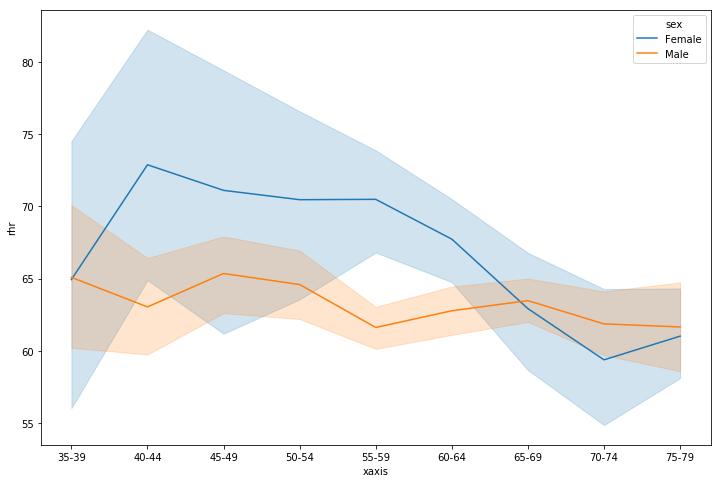

In [8]:
from matplotlib import pyplot as plt

labels = sorted(np.unique(df.age_group))
df['xaxis'] = df.age_group.map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='xaxis', y='rhr', hue='sex', data=df)
_ = plt.xticks(np.arange(len(labels)), labels)

## Conclusions

1. For women, we see a higher resting heart rate in the age groups 40-60 and lower in the age group 70-74.

2. For men we see a relatively smaller variance between the age groups. The resting heart rate in the age group 45-49 is higher.

3. In comparison to men, women's heart rate is overall higher.

4. The data is biased and not balanced. According the the decription, the data is collected from people who have had a myocardial infarction (MI) within the past two years. And from the value counts below, we can see that we have more male data than female data. We also have relatively smaller data in younger and older groups in both male and female.

5. To improve, we need data from youger groups (<35) and older groups (>80). We also need to collect more female data to reduce the variance in each age group.

6. The trend is more obvious in female data. More statistical analysis is needed to validate the trend in male data.

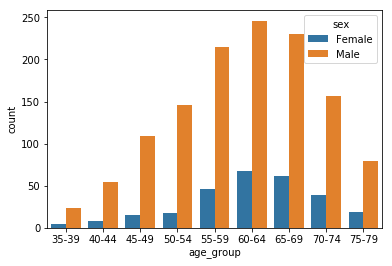

In [11]:
# age composition of male and female
ax = sns.countplot(x="age_group", hue="sex", data=df, order=sorted(df['age_group'].unique()))

In [12]:
## age composition of male
df[df['sex']=='Male']['age_group'].value_counts()

60-64    246
65-69    230
55-59    215
70-74    157
50-54    146
45-49    109
75-79     79
40-44     54
35-39     24
Name: age_group, dtype: int64

In [13]:
## age composition of female
df[df['sex']=='Female']['age_group'].value_counts()

60-64    67
65-69    61
55-59    46
70-74    39
75-79    19
50-54    18
45-49    15
40-44     8
35-39     4
Name: age_group, dtype: int64